In [1]:
from mnist_loader import load_data_wrapper
from plot import SmartPlot, randomColors

import numpy as np

import os.path
from os import path

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import network  as n1
import network2 as n2
import network3 as n3

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


Trying to run under a GPU.  If this is not desired, then modify network3.py to set the GPU flag to False.


# Projet de Deep Learning : "handwritten digits recognition"

## L'équipe

* BOUQUET Ewen - E4FI

* FOURNIER Loïc - E4FI

## Objectif

À partir des travaux du livre ["Neural networks and deep learning"](http://neuralnetworksanddeeplearning.com/), écris par Michael Nielsen en décembre 2019, réaliser un modèle pouvant faire de la reconnaissance de chiffre écrit à la main en se basant sur [la base de données MNIST](https://en.wikipedia.org/wiki/MNIST_database) avec un réseau multicouches classique, puis avec un réseau multicouches avec convolution.

# Code commun

Afficher une ou plusieurs images

In [2]:
def displayImages(fNames: list):
    anyExists = False

    for fName in fNames:
        if path.exists(fName):
            plt.imshow(mpimg.imread(fName))
            anyExists = True
            
    if anyExists:
        plt.show()

# Réseau multicouches classique

## Chargement des données

On charge les datasets d'entrainement, de validation et de test

In [3]:
training_data, validation_data, test_data = load_data_wrapper();
n_training_data, n_validation_data, n_test_data = len(training_data), len(validation_data), len(test_data);

Loading datasets...
Datasets loaded...
Formatting datasets...
Datasets formatted : 50000 images for training / 10000 images for validation / 10000 images for test.


## Utilisation du réseau 1

### Entrainement et test du réseau

On définit une fonction générique pour entraîner et tester le réseau 1 en fonction de certains paramètres

In [4]:
def trainAndTestNet1(layers, training_data, test_data, epochs, batch_size, eta, plot, color):

    # On créée le réseau de neurones
    net = n1.Network(layers)
    
    print()
    print("Training Network {0}... > layers={1}, eta={2}".format(net.id, layers, eta))
    
    # On entraine le réseau à partir du dataset d'apprentissage
    successPercentage = net.SGD(training_data, test_data, epochs, batch_size, eta, plot, color)

    # Fin de l'entrainement de l'IA
    print("Network {0} trained...".format(net.id))
    print()

    return successPercentage

### Choix des layers

Dans notre cas, on souhaite tester l'efficacité du réseau en fonction de sa strucuration en terme de layers. On laisse ainsi fixe le nombre d'épochs, le pas et le batch_size. Et on utilise ainsi plusieurs layers.


>> 1. TRAINING & TEST <<


Training Network 1... > layers=[784, 15, 10], eta=3
Epoch 5 / 50: 8658 / 10000 (86.58%)
Epoch 10 / 50: 8970 / 10000 (89.7%)
Epoch 15 / 50: 9036 / 10000 (90.36%)
Epoch 20 / 50: 9099 / 10000 (90.99%)
Epoch 25 / 50: 9129 / 10000 (91.29%)
Epoch 30 / 50: 9170 / 10000 (91.7%)
Epoch 35 / 50: 9206 / 10000 (92.06%)
Epoch 40 / 50: 9227 / 10000 (92.27%)
Epoch 45 / 50: 9231 / 10000 (92.31%)
Epoch 50 / 50: 9231 / 10000 (92.31%)
Network 1 trained...


Training Network 2... > layers=[784, 30, 10], eta=3
Epoch 5 / 50: 8918 / 10000 (89.18%)
Epoch 10 / 50: 9119 / 10000 (91.19%)
Epoch 15 / 50: 9200 / 10000 (92.0%)
Epoch 20 / 50: 9247 / 10000 (92.47%)
Epoch 25 / 50: 9290 / 10000 (92.9%)
Epoch 30 / 50: 9324 / 10000 (93.24%)
Epoch 35 / 50: 9337 / 10000 (93.37%)
Epoch 40 / 50: 9339 / 10000 (93.39%)
Epoch 45 / 50: 9366 / 10000 (93.66%)
Epoch 50 / 50: 9378 / 10000 (93.78%)
Network 2 trained...


Training Network 3... > layers=[784, 45, 10], eta=3
Epoch 5 / 50: 8212 / 10000 (82.12%)


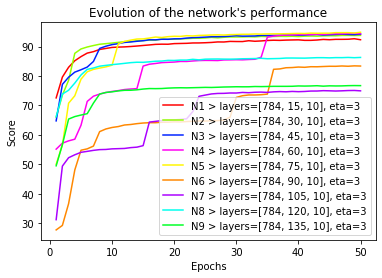

In [5]:
# Valeurs fixes
EPOCHS = 50
BATCH_SIZE = 2 ** 7
ETA = 3

# Valeurs dynamiques
LAYERS = [ [ 28 * 28, 15 * i, 10 ] for i in range(1, 10) ]

# ############################################################################# #
print("\n>> 1. TRAINING & TEST <<\n")
# ############################################################################# #

# Graphique
PLOT = SmartPlot("Evolution of the network's performance", path="./output/1/layers/")
COLORS = randomColors()

# On entraine et teste les réseaux de neurones
results = []
for i in range(len(LAYERS)):
    
    # On entraine l'IA
    successPercentage = trainAndTestNet1(LAYERS[i], training_data, test_data, EPOCHS, BATCH_SIZE, ETA, PLOT, COLORS[i])

    # On ajoute le pourcentage de prédiction
    results.append(successPercentage)

# ############################################################################# #
print("\n>> 2. RESULTS <<\n")
# ############################################################################# #

id = np.argmax(results)
print("Best Network: {0} (layer={1}), with {2}% success rate!".format(id, LAYERS[id], max(results)))

# On sauvegarde le plot
PLOT.build()

En faisant tourner le même programme avec plus d'épochs (30), on obtient les résultats suivants : 

In [6]:
displayImages([ "./output/save/30_epochs/1/layers/plot_.png" ])

On voit bien que certaines IA sont plus efficaces que d'autres. En particulier, les IA ayant les couches suivantes sont les plus efficientes : [784, 15, 10], [784, 30, 10] et [784, 45, 10]. On propose ainsi de continuer avec le réseau ayant les couches suivantes pour la suite du programme: [784, 15, 10].

## Choix du pas

On reprends la même logique que tout à l'heure, mais dans un objectif de trouver le pas obtimal. On fixe ainsi le nombre d'epcohs, le batch_size, et le layer. On teste avec plusieurs valeurs de pas.


>> 1. TRAINING & TEST <<


Training Network 10... > layers=[784, 15, 10], eta=0.75
Epoch 5 / 50: 6950 / 10000 (69.5%)
Epoch 10 / 50: 8091 / 10000 (80.91%)
Epoch 15 / 50: 8459 / 10000 (84.59%)
Epoch 20 / 50: 8683 / 10000 (86.83%)
Epoch 25 / 50: 8807 / 10000 (88.07%)
Epoch 30 / 50: 8883 / 10000 (88.83%)
Epoch 35 / 50: 8954 / 10000 (89.54%)
Epoch 40 / 50: 8999 / 10000 (89.99%)
Epoch 45 / 50: 9040 / 10000 (90.4%)
Epoch 50 / 50: 9056 / 10000 (90.56%)
Network 10 trained...


Training Network 11... > layers=[784, 15, 10], eta=1.5
Epoch 5 / 50: 7950 / 10000 (79.5%)
Epoch 10 / 50: 8746 / 10000 (87.46%)
Epoch 15 / 50: 8917 / 10000 (89.17%)
Epoch 20 / 50: 8992 / 10000 (89.92%)
Epoch 25 / 50: 9045 / 10000 (90.45%)
Epoch 30 / 50: 9102 / 10000 (91.02%)
Epoch 35 / 50: 9142 / 10000 (91.42%)
Epoch 40 / 50: 9159 / 10000 (91.59%)
Epoch 45 / 50: 9176 / 10000 (91.76%)
Epoch 50 / 50: 9192 / 10000 (91.92%)
Network 11 trained...


Training Network 12... > layers=[784, 15, 10], eta=2.25
Epoch 5 / 50: 8563 / 1

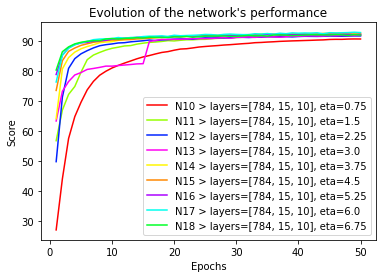

In [7]:
# Valeurs fixes
EPOCHS = 50
BATCH_SIZE = 2 ** 7
LAYER = [784, 15, 10]

# Valeurs dynamiques
ETAS = [ 0.75 * i for i in range(1, 10) ]

# ############################################################################# #
print("\n>> 1. TRAINING & TEST <<\n")
# ############################################################################# #

# Graphique
PLOT = SmartPlot("Evolution of the network's performance", path="./output/1/etas/")
COLORS = randomColors()

# On entraine et teste les réseaux de neurones
results = []
for i in range(len(ETAS)):
    
    # On entraine l'IA
    successPercentage = trainAndTestNet1(LAYER, training_data, test_data, EPOCHS, BATCH_SIZE, ETAS[i], PLOT, COLORS[i])

    # On ajoute le pourcentage de prédiction
    results.append(successPercentage)

# ############################################################################# #
print("\n>> 2. RESULTS <<\n")
# ############################################################################# #

id = np.argmax(results)
print("Best Eta: {0} (eta={1}), with {2}% success rate!".format(id, ETAS[id], max(results)))

# On sauvegarde le plot
PLOT.build()

En faisant tourner le même programme avec plus d'épochs (30), on obtient les résultats suivants : 

In [8]:
displayImages([ "./output/save/30_epochs/1/etas/plot_.png" ])

Encore un fois, on voit bien que certains sont plus intéressants que d'autres. En particulier, les pas suivants sont les plus efficients : 3.75, 4,5 et 5.25. On propose ainsi de continuer avec le pas 3.75, qui est plus stable que les autres.

### Tests avec différents ratios

On teste le réseau de neurones actuel avec 3 ratios différents concernant le nombre de données des datasets d'entrainement et d'apprentissage :
- 1/2 pour l'apprentisage et 1/2 pour les tests ;
- 2/3 pour l'apprentisage et 1/3 pour les tests ;
- 2/3 pour l'apprentisage et 1/3 pour les tests ;


>> 1. TRAINING & TEST <<


Training Network 19... > layers=[784, 15, 10], eta=3.75
Epoch 5 / 50: 3998 / 5000 (79.96%)
Epoch 10 / 50: 4261 / 5000 (85.22%)
Epoch 15 / 50: 4316 / 5000 (86.32%)
Epoch 20 / 50: 4357 / 5000 (87.14%)
Epoch 25 / 50: 4383 / 5000 (87.66%)
Epoch 30 / 50: 4405 / 5000 (88.1%)
Epoch 35 / 50: 4407 / 5000 (88.14%)
Epoch 40 / 50: 4421 / 5000 (88.42%)
Epoch 45 / 50: 4429 / 5000 (88.58%)
Epoch 50 / 50: 4425 / 5000 (88.5%)
Network 19 trained...


Training Network 20... > layers=[784, 15, 10], eta=3.75
Epoch 5 / 50: 2786 / 3333 (83.58835883588358%)
Epoch 10 / 50: 2890 / 3333 (86.70867086708671%)
Epoch 15 / 50: 2934 / 3333 (88.02880288028803%)
Epoch 20 / 50: 2952 / 3333 (88.56885688568858%)
Epoch 25 / 50: 2967 / 3333 (89.01890189018901%)
Epoch 30 / 50: 2975 / 3333 (89.25892589258926%)
Epoch 35 / 50: 2983 / 3333 (89.4989498949895%)
Epoch 40 / 50: 2987 / 3333 (89.61896189618962%)
Epoch 45 / 50: 2991 / 3333 (89.73897389738974%)
Epoch 50 / 50: 2993 / 3333 (89.7989798979898%)
Ne

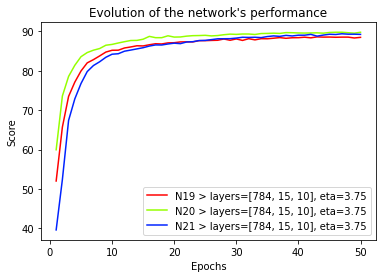

In [9]:
# Valeurs fixes
EPOCHS = 50
BATCH_SIZE = 2 ** 7
ETA = 3.75
LAYER = [784, 15, 10]

# Valeurs dynamiques
TRAINING_SIZES = [ n_training_data*1/2, n_training_data*2/3, n_training_data*1/3 ]
TEST_SIZES = [ n_test_data*1/2, n_test_data*1/3, n_test_data*2/3 ]

# ############################################################################# #
print("\n>> 1. TRAINING & TEST <<\n")
# ############################################################################# #

# Graphique
PLOT = SmartPlot("Evolution of the network's performance", path="./output/1/ratios/")
COLORS = randomColors()

# On entraine les réseaux de neurones
results = []
for i in range(3):
    # On entraine l'IA
    successPercentage = trainAndTestNet1(LAYER, training_data[:int(TRAINING_SIZES[i])], test_data[:int(TEST_SIZES[i])], EPOCHS, BATCH_SIZE, ETA, PLOT, COLORS[i])

    # On ajoute le pourcentage de prédiction
    results.append(successPercentage)


# ############################################################################# #
print("\n>> 2. RESULTS <<\n")
# ############################################################################# #

id = np.argmax(results)
print("Best ratio: {0} (L={1}, T={2}), with {3}% success rate!".format(id, int(TRAINING_SIZES[id]), int(TEST_SIZES[id]), max(results)))

# On sauvegarde le plot
PLOT.build()

Avec 30 epochs, on obtient le schéma suivant :

In [10]:
displayImages([ "./output/save/30_epochs/1/ratios/plot_.png" ])

Ainsi, même si les 3 réseaux sont performants, on remarque que le réseau 2 (violet) est plus performant que le réseau 1 (jaune), qui lui est meilleur que le réseau 3 (vert). On peut ainsi en conclure qu'il important de procéder à la phase d'apprentissage un maximum d'images. En effet, les réseaux entraînés avec un dataset d'apprentissage plus conséquent sont plus efficientes. Et concernant les tests, une quantité inférieure peut être suffisante.

## Utilisation du réseau 2

### Entrainement et test du réseau

On définit une fonction générique pour entraîner et tester le réseau 2 en fonction de certains paramètres

In [11]:
def trainAndTestNet2(layers, training_data, test_data, epochs, batch_size, eta, lmbda, accPlot, costPlot, color):

    # On créée le réseau de neurones
    net = n2.Network(layers)
    
    print()
    print("Training Network {}... > layers={}, eta={}, lmbda={:.2f}".format(net.id, layers, eta, lmbda))
    print()
    
    # On entraine le réseau à partir du dataset d'apprentissage
    evaluation_cost, evaluation_accuracy, training_cost, training_accuracy = net.SGD(
        training_data, test_data, epochs, batch_size, eta, lmbda, accPlot, costPlot, color, 
        monitor_evaluation_cost=True, monitor_evaluation_accuracy=True, 
        monitor_training_cost=True, monitor_training_accuracy=True
    )

    # Fin de l'entrainement de l'IA
    print("Network {0} trained...".format(net.id))
    print()

    # On renvoie les résultats du dernier batch
    return evaluation_cost[-1], evaluation_accuracy[-1], training_cost[-1], training_accuracy[-1]

### Choix du lmbda

On va étudier l'effet du lmbda sur le réseau.


>> 1. TRAINING & TEST <<


Training Network 1... > layers=[784, 15, 10], eta=3.75, lmbda=0.02

Epoch 5 training complete
Cost on training data: 0.6476
Accuracy on training data: 44921 / 50000 (89.84%)
Cost on evaluation data: 0.6832
Accuracy on evaluation data: 8919 / 10000 (89.19%)

Epoch 10 training complete
Cost on training data: 0.5221
Accuracy on training data: 46100 / 50000 (92.20%)
Cost on evaluation data: 0.5955
Accuracy on evaluation data: 9086 / 10000 (90.86%)

Epoch 15 training complete
Cost on training data: 0.4682
Accuracy on training data: 46363 / 50000 (92.73%)
Cost on evaluation data: 0.5586
Accuracy on evaluation data: 9140 / 10000 (91.40%)

Epoch 20 training complete
Cost on training data: 0.4494
Accuracy on training data: 46510 / 50000 (93.02%)
Cost on evaluation data: 0.5542
Accuracy on evaluation data: 9137 / 10000 (91.37%)

Epoch 25 training complete
Cost on training data: 0.4444
Accuracy on training data: 46564 / 50000 (93.13%)
Cost on evaluation data: 0.5713
Ac

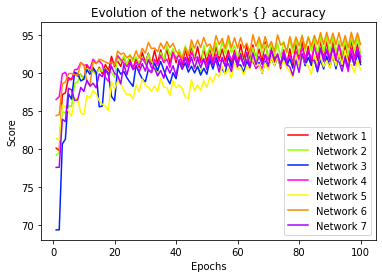

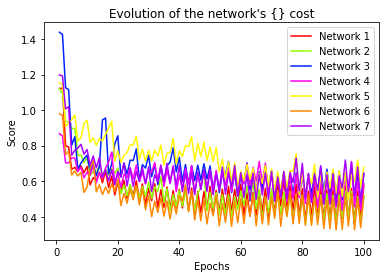

In [12]:
# Valeurs fixes
EPOCHS = 50
BATCH_SIZE = 2 ** 7
ETA = 3.75
LAYER = [784, 15, 10]

# Valeurs dynamiques
LMBDAS = [ 0.02 * i for i in range(1, 8) ]

# ############################################################################# #
print("\n>> 1. TRAINING & TEST <<\n")
# ############################################################################# #

# Graphique
ACC_PLOT = SmartPlot("Evolution of the network's {} accuracy", path="./output/2/etas/")
COST_PLOT = SmartPlot("Evolution of the network's {} cost", path="./output/2/etas/")
COLORS = randomColors()

ecs, eas, tcs, tas = [], [], [], []
for i in range(len(LMBDAS)):
    # On entraine l'IA
    evaluation_cost, evaluation_accuracy, training_cost, training_accuracy = trainAndTestNet2(LAYER, training_data, test_data, EPOCHS, BATCH_SIZE, ETA, LMBDAS[i], ACC_PLOT, COST_PLOT, COLORS[i])

    # On ajoute les scores
    ecs.append(evaluation_cost)
    eas.append(evaluation_accuracy)
    tcs.append(training_cost)
    tas.append(training_accuracy)

ACC_PLOT.build()
COST_PLOT.build()

# ############################################################################# #
print("\n>> 2. RESULTS <<\n")
# ############################################################################# #

id = np.argmax(ecs)
print("Best evaluation cost: {0} ({1:.4f}), with {2:.4f}!".format(id, LMBDAS[id], max(ecs)))

id = np.argmax(eas)
print("Best evaluation accuracy: {0} ({1}), with {2} / {3}!".format(id, LMBDAS[id], max(eas), n_test_data))

id = np.argmax(tcs)
print("Best training cost: {0} ({1:.4f}), with {2:.4f}!".format(id, LMBDAS[id], max(tcs)))

id = np.argmax(tas)
print("Best training accuracy: {0} ({1}), with {2} / {3}!".format(id, LMBDAS[id], max(tas), n_training_data))

En faisant tourner le même programme avec plus d'épochs (30), on obtient les résultats suivants : 

In [13]:
displayImages([ "./output/2/etas/plot_.png", "./output/2/etas/plot_.png" ])

Les lmbdas suivants sont les plus efficients : 0,3, 0,4 et 0,6. On propose ainsi de continuer avec le lmbda 0,4, qui est plus efficiente que les autres.

### Tests avec différents ratios

On teste le réseau de neurones actuel avec 3 ratios différents concernant le nombre de données des datasets d'entrainement et d'apprentissage :
- 1/2 pour l'apprentisage et 1/2 pour les tests ;
- 2/3 pour l'apprentisage et 1/3 pour les tests ;
- 2/3 pour l'apprentisage et 1/3 pour les tests ;


>> 1. TRAINING & TEST <<


Training Network 8... > layers=[784, 15, 10], eta=3.75, lmbda=0.40

Epoch 5 training complete
Cost on training data: 0.7837
Accuracy on training data: 21917 / 25000 (87.67%)
Cost on evaluation data: 1.0173
Accuracy on evaluation data: 4233 / 5000 (84.66%)

Epoch 10 training complete
Cost on training data: 0.9695
Accuracy on training data: 21331 / 25000 (85.32%)
Cost on evaluation data: 1.2232
Accuracy on evaluation data: 4116 / 5000 (82.32%)

Epoch 15 training complete
Cost on training data: 0.5892
Accuracy on training data: 22799 / 25000 (91.20%)
Cost on evaluation data: 0.9310
Accuracy on evaluation data: 4347 / 5000 (86.94%)

Epoch 20 training complete
Cost on training data: 0.6548
Accuracy on training data: 22490 / 25000 (89.96%)
Cost on evaluation data: 1.0062
Accuracy on evaluation data: 4331 / 5000 (86.62%)

Epoch 25 training complete
Cost on training data: 0.5921
Accuracy on training data: 22875 / 25000 (91.50%)
Cost on evaluation data: 0.9871
Accura

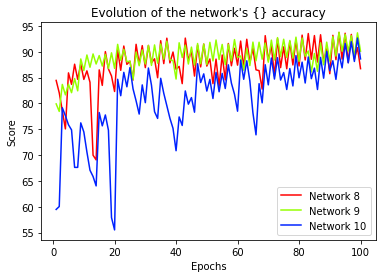

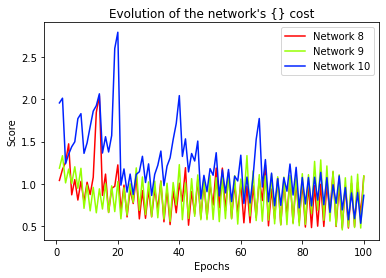

In [14]:
# Valeurs fixes
EPOCHS = 50
BATCH_SIZE = 2 ** 7
ETA = 3.75
LMBDA = 0.4
LAYER = [784, 15, 10]

# Valeurs dynamiques
TRAINING_SIZES = [ n_training_data*1/2, n_training_data*2/3, n_training_data*1/3 ]
TEST_SIZES = [ n_test_data*1/2, n_test_data*1/3, n_test_data*2/3 ]

# ############################################################################# #
print("\n>> 1. TRAINING & TEST <<\n")
# ############################################################################# #

# Graphique
ACC_PLOT = SmartPlot("Evolution of the network's {} accuracy", path="./output/2/ratios/")
COST_PLOT = SmartPlot("Evolution of the network's {} cost", path="./output/2/ratios/")
COLORS = randomColors()

ecs, eas, tcs, tas = [], [], [], []
for i in range(3):
    # On entraine l'IA
    evaluation_cost, evaluation_accuracy, training_cost, training_accuracy = trainAndTestNet2(LAYER, training_data[:int(TRAINING_SIZES[i])], test_data[:int(TEST_SIZES[i])], EPOCHS, BATCH_SIZE, ETA, LMBDA, ACC_PLOT, COST_PLOT, COLORS[i])

    # On ajoute les scores
    ecs.append(evaluation_cost)
    eas.append(evaluation_accuracy)
    tcs.append(training_cost)
    tas.append(training_accuracy)

ACC_PLOT.build()
COST_PLOT.build()

# ############################################################################# #
print("\n>> 2. RESULTS <<\n")
# ############################################################################# #

id = np.argmax(ecs)
print("Best evaluation cost: {0} (L={1}, T={2}), with {3}!".format(id, int(TRAINING_SIZES[id]), int(TEST_SIZES[id]), max(ecs)))

id = np.argmax(eas)
print("Best evaluation accuracy: {0} (L={1}, T={2}), with {3} / {4} ({5:.2f}%)!".format(id, int(TRAINING_SIZES[id]), int(TEST_SIZES[id]), max(eas), n_test_data, max(eas) * 100 / n_test_data))

id = np.argmax(tcs)
print("Best training cost: {0} (L={1}, T={2}), with {3}!".format(id, int(TRAINING_SIZES[id]), int(TEST_SIZES[id]), max(tcs)))

id = np.argmax(tas)
print("Best training accuracy: {0} (L={1}, T={2}), with {3} / {4} ({5:.2f}%)!".format(id, int(TRAINING_SIZES[id]), int(TEST_SIZES[id]), max(tas), n_training_data, max(tas) * 100 / n_training_data))

Avec 30 epochs, on obtient les résultats suivants :

In [15]:
displayImages([ "./output/2/ratios/plot_.png", "./output/2/ratios/plot_.png" ])

# Réseau multicouches avec convolutions

## Chargement des données

On charge les datasets d'entrainement, de validation et de test

In [16]:
data, n_training_data, n_validation_data, n_test_data = n3.load_data_shared()
training_data, validation_data, test_data = data

Datasets formatted : 50000 images for training / 10000 images for validation / 10000 images for test.


## Utilisation du réseau 3

### Entrainement et test du réseau

On définit une fonction générique pour entraîner et tester le réseau 2 en fonction de certains paramètres

In [17]:
def trainAndTestNet3(id, layers, training_data, validation_data, test_data, epochs, batch_size, eta, lmbda, testAccuracyPlot, validationAccuracyPlot, learningCostPlot, color):
    
    print()
    print("Training Network {}... > L={}, V={}, T={}".format(id, len(training_data), len(validation_data), len(test_data)))
    print()

    # On créée le réseau de neurones
    net = n3.Network(layers, batch_size)
    
    # On entraine le réseau à partir du dataset d'apprentissage
    data = net.SGD(training_data, epochs, batch_size, eta, validation_data, test_data, lmbda, learningCostPlot, validationAccuracyPlot, testAccuracyPlot, color)

    # Fin de l'entrainement de l'IA
    print("Network {} trained...".format(id))
    print()

    # On renvoie les résultats du dernier batch
    return data

### Tests avec différents ratios

On teste le réseau de neurones actuel avec 3 ratios différents concernant le nombre de données des datasets d'entrainement et d'apprentissage :
- 1/2 pour l'apprentisage et 1/2 pour les tests ;
- 2/3 pour l'apprentisage et 1/3 pour les tests ;
- 2/3 pour l'apprentisage et 1/3 pour les tests ;


>> 1. TRAINING & TEST <<


Training Network 1... > L=2, V=2, T=2

Epoch 5
- Training cost 48.89%
- Validation accuracy 91.59%
- Test accuracy 90.66%
Epoch 10
- Training cost 47.73%
- Validation accuracy 91.11%
- Test accuracy 90.32%
Epoch 15
- Training cost 46.85%
- Validation accuracy 90.10%
- Test accuracy 89.17%
Epoch 20
- Training cost 46.36%
- Validation accuracy 90.21%
- Test accuracy 89.26%
Epoch 25
- Training cost 46.18%
- Validation accuracy 90.35%
- Test accuracy 89.49%
Epoch 30
- Training cost 46.17%
- Validation accuracy 90.87%
- Test accuracy 90.23%
Epoch 35
- Training cost 46.05%
- Validation accuracy 91.04%
- Test accuracy 90.22%
Epoch 40
- Training cost 45.93%
- Validation accuracy 90.59%
- Test accuracy 89.81%
Epoch 45
- Training cost 45.86%
- Validation accuracy 90.15%
- Test accuracy 89.29%
Epoch 50
- Training cost 45.82%
- Validation accuracy 89.92%
- Test accuracy 89.11%

Finished training network.
Best validation accuracy : 91.82% corresponding to epoch 4
Best te

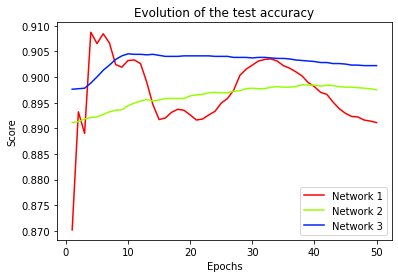

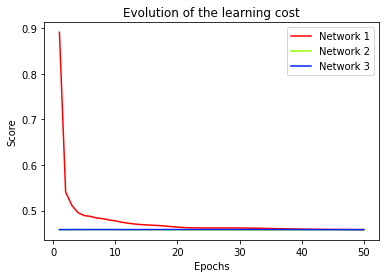

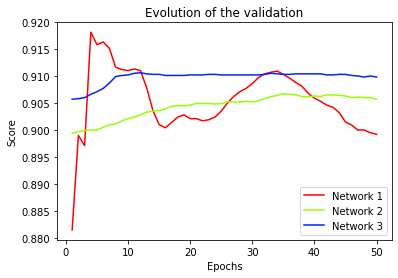

In [18]:
# Valeurs fixes
EPOCHS = 50
BATCH_SIZE = 2 ** 7
ETA = 3.75
LMBDA = 0.4
LAYER = [
    n3.FullyConnectedLayer(n_in=784, n_out=100),
    n3.SoftmaxLayer(n_in=100, n_out=10)
]

# Valeurs dynamiques
TRAINING_SIZES = [ n_training_data*1/2, n_training_data*2/3, n_training_data*1/3 ]
VALIDATION_SIZES = [ n_test_data*1/2, n_test_data*1/3, n_test_data*2/3 ]
TEST_SIZES = [ n_test_data*1/2, n_test_data*1/3, n_test_data*2/3 ]

# ############################################################################# #
print("\n>> 1. TRAINING & TEST <<\n")
# ############################################################################# #

# Graphique
testAccuracyPlot = SmartPlot("Evolution of the test accuracy", path="./output/3/")
validationAccuracyPlot = SmartPlot("Evolution of the validation", path="./output/3/")
learningCostPlot = SmartPlot("Evolution of the learning cost", path="./output/3/")
COLORS = randomColors()

bvas, bvas_epoch, bvas_lc, bvas_ta, tas, tas_epoch, tas_lc, tas_va = [], [], [], [], [], [], [], []
for i in range(3):
    
    # On entraine l'IA
    bva, bva_epoch, bva_ta, vba_tc, bta, bta_epoch, bta_va, bta_tc = trainAndTestNet3(i+1, LAYER, training_data[:int(TRAINING_SIZES[i])], validation_data[:int(VALIDATION_SIZES[i])], test_data[:int(TEST_SIZES[i])], EPOCHS, BATCH_SIZE, ETA, LMBDA, testAccuracyPlot, validationAccuracyPlot, learningCostPlot, COLORS[i])

    # On ajoute les scores
    bvas.append(bva)
    bvas_epoch.append(bva_epoch)
    bvas_ta.append(bva_ta)
    bvas_lc.append(vba_tc)

    tas.append(bta)
    tas_epoch.append(bta_epoch)
    tas_va.append(bta_va)
    tas_lc.append(bta_tc)


# On récupère les valeurs des graphiques
testAccuracyPlot.build()
learningCostPlot.build()
validationAccuracyPlot.build()


# ############################################################################# #
print("\n>> 2. RESULTS <<\n")
# ############################################################################# #

id = np.argmax(bvas)
print("Best validation accuracy: {} (L={}, V={}, T={})".format(id, int(TRAINING_SIZES[id]), int(VALIDATION_SIZES[i]), int(TEST_SIZES[id])))
print(" - Epoch : {}".format(bvas_epoch[id]))
print(" - Learning cost : {}".format(bvas_lc[id]))
print(" - Validation accuracy : {} / {} ({:.2f}%)".format(bvas[id], int(VALIDATION_SIZES[i]), bvas[id] * 100 / int(VALIDATION_SIZES[i])))
print(" - Test accuracy : {} / {} ({:.2f}%)".format(max(bvas_ta), int(TEST_SIZES[i]), max(bvas_ta) * 100 / int(TEST_SIZES[i])))

print()

id = np.argmax(tas)
print("Best validation accuracy: {} (L={}, V={}, T={})".format(id, int(TRAINING_SIZES[id]), int(VALIDATION_SIZES[i]), int(TEST_SIZES[id])))
print(" - Epoch : {}".format(tas_epoch[id]))
print(" - Learning cost : {}".format(tas_lc[id]))
print(" - Validation accuracy : {} / {} ({:.2f}%)".format(tas_va[id], int(VALIDATION_SIZES[i]), tas_va[id] * 100 / int(VALIDATION_SIZES[i])))
print(" - Test accuracy : {} / {} ({:.2f}%)".format(tas[id], int(TEST_SIZES[i]), tas[id] * 100 / int(TEST_SIZES[i])))


Avec 30 epochs, on obtient les résultats suivants :

In [19]:
displayImages([ "./output/3/plot_.png", "./output/3/plot_.png", "./output/3/plot_.png" ])